<a href="https://colab.research.google.com/github/zdeik/webstart/blob/main/K_POP_%EA%B7%B8%EB%A3%B9_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/nicolsalayoarias/kpop-groups-dataset?resource=download

데이터셋 다운로드하기

데이터 업로드하기

Name: 그룹 이름

Gender: 성별 (Male / Female)

Debut: 데뷔 날짜

Company: 소속사

Members: 현재 멤버 수

Orig Memb: 원래 멤버 수

Fanclub Name: 팬클럽 이름

Active: 현재 활동 여부 (Yes / No)

# K-pop 그룹 분석

분석 목표

* 성별에 따른 K-pop 그룹 수 비교
* 소속사별 K-pop 그룹 수
* 활동 중인 그룹 비율
* 멤버 수 분포 시각화
* 연도별 데뷔 그룹 수 분석 (날짜 처리 연습 포함)

In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'kpopgroups.csv'
df = pd.read_csv(file_path)

# Show the first few rows and basic info
df.head()


,Name,Short,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,Female,2/05/2018,Cube,5,6,NaN,Yes
1,100%,NaN,백퍼센트,Male,18/09/2012,TOP Media,4,7,Perfection,Yes
2,14U,NaN,원포유,Male,17/04/2017,BG,14,14,NaN,No
3,15&,NaN,피프틴앤드,Female,5/10/2012,JYP,2,2,NaN,No
4,1TEAM,NaN,원팀,Male,27/03/2019,LiveWorks,5,5,NaN,No


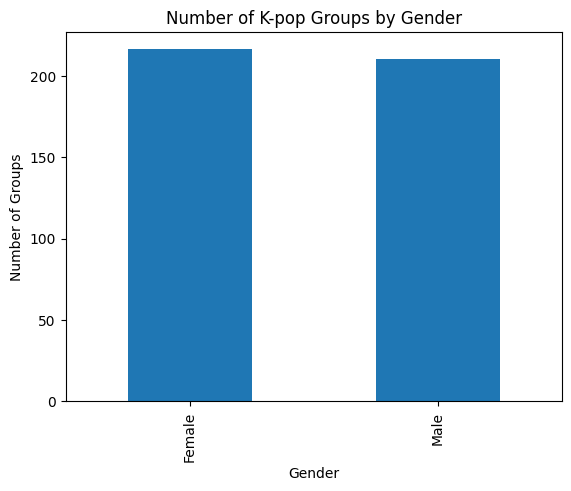

In [2]:
import matplotlib.pyplot as plt

# 성별에 따른 K-pop 그룹 수 비교
gender_counts = df['Gender'].value_counts()

# Plot as bar chart
gender_counts.plot(kind='bar')
plt.title('Number of K-pop Groups by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Groups')
plt.show()


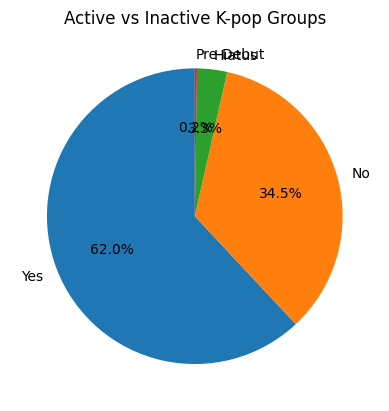

In [3]:
# 활동 중인 그룹과 해체 그룹 비율
active_counts = df['Active'].value_counts()

# Plot as pie chart
active_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Active vs Inactive K-pop Groups')
plt.ylabel('')
plt.show()


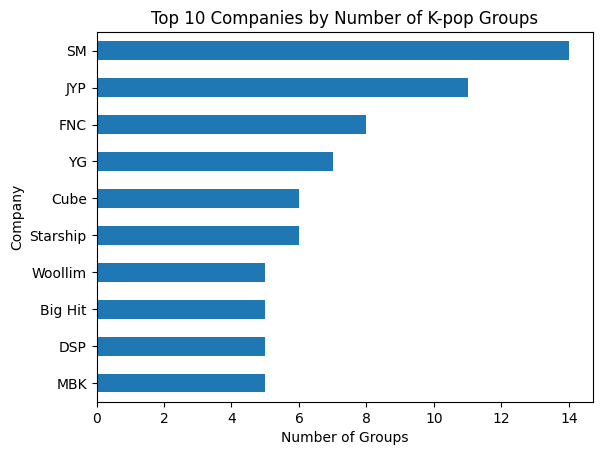

In [4]:
#소속사별 그룹 수 (상위 10개)
# Count groups by company and show top 10
top_companies = df['Company'].value_counts().head(10)

# Plot as horizontal bar chart
top_companies.plot(kind='barh')
plt.title('Top 10 Companies by Number of K-pop Groups')
plt.xlabel('Number of Groups')
plt.ylabel('Company')
plt.gca().invert_yaxis()
plt.show()


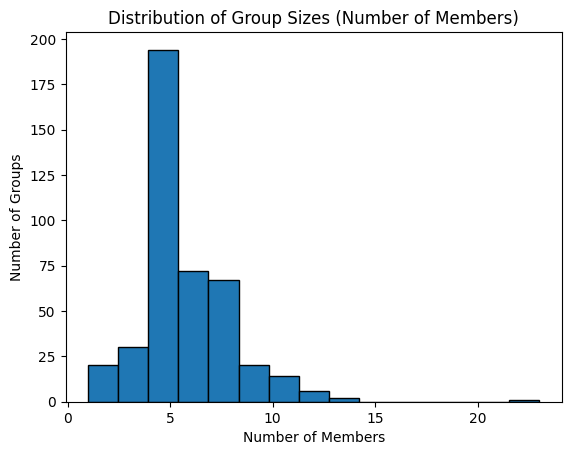

In [5]:
# 그룹 멤버 수 분포
df['Members'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Distribution of Group Sizes (Number of Members)')
plt.xlabel('Number of Members')
plt.ylabel('Number of Groups')
plt.show()


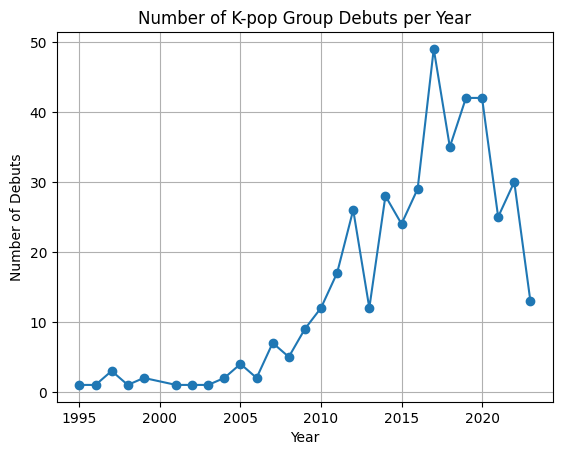

In [6]:
# 연도별 데뷔 그룹 수
df['Debut'] = pd.to_datetime(df['Debut'], errors='coerce', dayfirst=True)

# Extract year from debut date
df['Debut Year'] = df['Debut'].dt.year

# Count number of debuts by year
debut_per_year = df['Debut Year'].value_counts().sort_index()

# Plot line graph of debut counts by year
debut_per_year.plot(kind='line', marker='o')
plt.title('Number of K-pop Group Debuts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Debuts')
plt.grid(True)
plt.show()
